In [1]:
!pip install chart_studio
!pip install plotly --upgrade

Requirement already up-to-date: plotly in /Users/Alex-Reyes/opt/anaconda3/lib/python3.8/site-packages (4.11.0)


In [2]:
import chart_studio
chart_studio.tools.set_credentials_file(username='nakozo97', api_key='JlYqIEa24e2LnZPOL59n')

In [3]:
import geopandas as gp
df = gp.read_file('Resources/cb_2018_us_zcta510_500k.shp')

In [4]:
df.tail()

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
33139,10983,8600000US10983,10983,5267037,16676,"POLYGON ((-73.96564099999999 41.027873, -73.96..."
33140,50460,8600000US50460,50460,93166133,0,"POLYGON ((-92.806293 43.230259, -92.8035419999..."
33141,40870,8600000US40870,40870,18226594,201441,"POLYGON ((-83.19264199999999 36.916502, -83.19..."
33142,40914,8600000US40914,40914,32269366,419039,"POLYGON ((-83.62747899999999 37.074189, -83.62..."
33143,52750,8600000US52750,52750,77963307,472441,"POLYGON ((-90.44672299999999 41.891512, -90.44..."


In [5]:
x,y=df['geometry'][3].exterior.xy

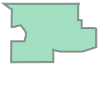

In [6]:
df['geometry'][24]

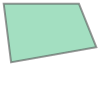

In [7]:
df['geometry'][24].simplify(0.2)

In [8]:
print(df['geometry'][24].type)

Polygon


In [9]:
len(df['geometry'][24])

TypeError: object of type 'Polygon' has no len()

In [10]:
df['geometry'][18].exterior.xy[1][0]

33.302729

In [11]:
df['geometry'][24].centroid.xy

(array('d', [-88.41944909283772]), array('d', [42.45620838199368]))

In [13]:
import chart_studio.plotly as py
import plotly.graph_objects as go

In [14]:
layout = dict(
    hovermode = 'closest',
    xaxis = dict(
        autorange = False,
        range = [-125, -65],
        showgrid = False,
        zeroline = False,
        fixedrange = True
    ),
    yaxis = dict(
        autorange = False,
        range = [25, 49],
        showgrid = False,
        zeroline = False,
        fixedrange = True
    ),
    margin = dict(
        t=20,
        b=20,
        r=20,
        l=20
    ),
    width = 1100,
    height = 650,
    dragmode = 'select'
)

In [20]:
plot_data = []
for index,row in df.iterrows():
    if df['geometry'][index].type == 'Polygon':
        x,y = row.geometry.exterior.xy
        c_x,c_y = row.geometry.centroid.xy
    elif df['geometry'][index].type == 'MultiPolygon':
        x = [poly.exterior.xy[0] for poly in df['geometry'][index]]
        y = [poly.exterior.xy[1] for poly in df['geometry'][index]]
        x_c = [poly.centroid.xy[0] for poly in df['geometry'][index]]
        y_c = [poly.centroid.xy[1] for poly in df['geometry'][index]]        
    else: 
        print('stop')
    county_outline = dict(
            type = 'choropleth',
            showlegend = False,
            legendgroup = "shapes",
            line = dict(color='black', width=1),
            x=x,
            y=y,
            fill='toself',
            fillcolor = 'purple',
            hoverinfo='none'
    )
    hover_point = dict(
            type = 'choropleth',
            showlegend = False,
            legendgroup = "centroids",
#             name = row.NAME,
            marker = dict(size=2),
#             x=c_x,
#             y=c_y,
            fill='toself',
            fillcolor = 'purple'            
    )
    plot_data.append(county_outline)
    plot_data.append(hover_point)


In [18]:
len(plot_data)

66288

In [19]:
fig = dict(data=plot_data, layout=layout)
py.plot(fig, filename='Resources/cb_2018_us_zcta510_500k.shp')

ValueError: 
    Invalid value of type 'array.array' received for the 'x' property of scatter
        Received value: array('d', [-86.743844, -86.738019, -86.73291499999999, -86.732518, -86.730392, -86.72702, -86.726158, -86.72450599999999, -86.721696, -86.71727399999999, -86.716466, -86.717278, -86.71882699999999, -86.715175, -86.713629, -86.709187, -86.707436, -86.709932, -86.708266, -86.70285899999999, -86.701483, -86.699338, -86.698911, -86.696484, -86.695638, -86.695802, -86.691538, -86.690266, -86.690332, -86.68181, -86.681838, -86.679757, -86.679501, -86.67640999999999, -86.672617, -86.662661, -86.660997, -86.656595, -86.65537499999999, -86.65139599999999, -86.649717, -86.64679699999999, -86.645364, -86.644128, -86.64231, -86.63980699999999, -86.640783, -86.642749, -86.641947, -86.643322, -86.646115, -86.645949, -86.642877, -86.640805, -86.636962, -86.63345799999999, -86.633263, -86.631176, -86.63123399999999, -86.62249, -86.622552, -86.619051, -86.618346, -86.622535, -86.622535, -86.626733, -86.626678, -86.627704, -86.628794, -86.631248, -86.631248, -86.635459, -86.635454, -86.63949099999999, -86.639641, -86.638812, -86.638149, -86.63716199999999, -86.63541599999999, -86.630861, -86.626815, -86.62558299999999, -86.62208199999999, -86.622136, -86.62575799999999, -86.626689, -86.626702, -86.63702599999999, -86.639605, -86.6375, -86.63772, -86.634541, -86.633461, -86.6306, -86.627943, -86.62526, -86.619005, -86.61768, -86.613647, -86.613677, -86.609195, -86.609258, -86.604795, -86.60485299999999, -86.60070499999999, -86.60273099999999, -86.601601, -86.602584, -86.60428499999999, -86.60233199999999, -86.60054099999999, -86.60055, -86.60229799999999, -86.601041, -86.601998, -86.60141399999999, -86.602279, -86.603533, -86.603286, -86.60247, -86.600749, -86.599071, -86.598534, -86.59849899999999, -86.597353, -86.595305, -86.595339, -86.594656, -86.592461, -86.589456, -86.59210999999999, -86.591399, -86.588545, -86.588174, -86.585741, -86.58597499999999, -86.582858, -86.58287399999999, -86.58097599999999, -86.579695, -86.579431, -86.57784199999999, -86.576045, -86.575982, -86.57352999999999, -86.571831, -86.570854, -86.571463, -86.570697, -86.561278, -86.561171, -86.563177, -86.56314499999999, -86.56123199999999, -86.561145, -86.565574, -86.565641, -86.57000699999999, -86.570146, -86.571494, -86.57225199999999, -86.573848, -86.575192, -86.577201, -86.576037, -86.57765599999999, -86.574732, -86.574709, -86.57814599999999, -86.568162, -86.57027099999999, -86.572662, -86.57245999999999, -86.568879, -86.567149, -86.564348, -86.567188, -86.56212599999999, -86.56366299999999, -86.56481699999999, -86.564211, -86.56732099999999, -86.56969099999999, -86.56983799999999, -86.569287, -86.566893, -86.566203, -86.56271199999999, -86.562253, -86.563392, -86.564694, -86.566175, -86.57004599999999, -86.575788, -86.575116, -86.57497099999999, -86.57074899999999, -86.570714, -86.57256699999999, -86.57595599999999, -86.577975, -86.57446999999999, -86.56867199999999, -86.565643, -86.563769, -86.55887899999999, -86.55754499999999, -86.559924, -86.560893, -86.561364, -86.560068, -86.557092, -86.555247, -86.554785, -86.55599699999999, -86.547488, -86.545349, -86.545574, -86.544686, -86.541854, -86.540415, -86.540476, -86.54239299999999, -86.543356, -86.541292, -86.539765, -86.538918, -86.53752899999999, -86.53573899999999, -86.534849, -86.532865, -86.528885, -86.526145, -86.52347999999999, -86.521327, -86.519762, -86.51071, -86.508518, -86.50312699999999, -86.50359, -86.502721, -86.49998, -86.496347, -86.491384, -86.48914099999999, -86.487684, -86.484308, -86.483468, -86.482811, -86.482985, -86.481504, -86.483167, -86.487657, -86.48956199999999, -86.488698, -86.489606, -86.487562, -86.48785, -86.486268, -86.487377, -86.485749, -86.48516599999999, -86.485693, -86.484437, -86.485738, -86.485659, -86.53124199999999, -86.535144, -86.541893, -86.53862, -86.54035499999999, -86.544178, -86.54408, -86.545486, -86.54656299999999, -86.54677799999999, -86.584822, -86.585043, -86.586894, -86.591458, -86.59622, -86.597034, -86.599119, -86.601371, -86.601248, -86.604535, -86.608245, -86.61152299999999, -86.612623, -86.614204, -86.615055, -86.615653, -86.613485, -86.61452899999999, -86.61598099999999, -86.615451, -86.618479, -86.619002, -86.620335, -86.621686, -86.62131699999999, -86.622616, -86.62131199999999, -86.626396, -86.63053099999999, -86.629972, -86.632193, -86.631664, -86.632143, -86.635359, -86.63645, -86.638785, -86.64004299999999, -86.64085299999999, -86.638874, -86.640661, -86.640785, -86.63935, -86.63883, -86.63593999999999, -86.637064, -86.64093299999999, -86.641048, -86.636738, -86.63727999999999, -86.63897899999999, -86.642438, -86.645009, -86.64684199999999, -86.648016, -86.648949, -86.650947, -86.655189, -86.656966, -86.660662, -86.664192, -86.667992, -86.66924499999999, -86.671655, -86.67409699999999, -86.676734, -86.678157, -86.679946, -86.682253, -86.682408, -86.684215, -86.683675, -86.68409799999999, -86.68476799999999, -86.685327, -86.685859, -86.68819599999999, -86.683219, -86.682981, -86.684451, -86.685163, -86.702697, -86.702674, -86.707734, -86.722914, -86.72286799999999, -86.72715699999999, -86.727023, -86.732378, -86.733261, -86.73962999999999, -86.739682, -86.740139, -86.738569, -86.739029, -86.736138, -86.73376999999999, -86.732692, -86.73278499999999, -86.73425999999999, -86.734235, -86.736226, -86.736392, -86.733487, -86.729592, -86.731337, -86.732655, -86.733965, -86.73594299999999, -86.734574, -86.73235, -86.730976, -86.72779899999999, -86.728307, -86.730339, -86.730452, -86.72981399999999, -86.728522, -86.72716, -86.72683599999999, -86.727114, -86.729237, -86.729822, -86.729174, -86.729783, -86.736482, -86.742676, -86.745076, -86.743844])

    The 'x' property is an array that may be specified as a tuple,
    list, numpy array, or pandas Series